# Problem Set 2: Pandas and Scikit-learn with Hurricane Data

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759581 sha256=92fa1bb61bebf8162f2b5892ebeab5e0453275e11cfde3d06c9cc0cb53549047
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxpnpir2/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from mpl_toolkits.basemap import Basemap



In [ ]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [ ]:
basin = df['BASIN'].unique()
print(basin)

['NI' 'SI' 'NA' 'EP' 'WP' 'SP' 'SA']


In [ ]:
subbasin = df['SUBBASIN'].unique()
print(subbasin)

['BB' 'AS' 'MM' 'GM' 'NA' 'CS' 'WA' 'EA' 'CP']


In [ ]:
nature = df['NATURE'].unique()
print(nature)

['NR' 'TS' 'ET' 'SS' 'MX' 'DS']


How many North Atlantic hurricanes are in this dataset?

In [ ]:
NAcount = 0
for hurricane in df['BASIN']:
  if hurricane=="NA":
    NAcount+=1

print(NAcount)

122315


### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [ ]:
df = df.rename(columns={'WMO_WIND': 'WIND', 'WMO_PRES': 'PRES'})

**2a) Converting Winds from knots to mph**

In [ ]:
df['WIND'] = df['WIND']*1.15078

### 3) Get the 10 largest rows in the dataset by `WIND`

In [ ]:
highest_wind = df.nlargest(10, 'WIND')
highest_wind

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
665303,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,212.8943,872.0
665301,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,207.1404,886.0
665305,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,207.1404,878.0
426786,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,189.8787,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,184.1248,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,184.1248,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,184.1248,NaN
481224,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,184.1248,888.0
551609,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,184.1248,902.0
604896,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,184.1248,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [ ]:
df['BASIN']

0         NI
1         NI
2         NI
3         NI
4         NI
          ..
698320    SI
698321    SI
698322    SI
698323    SI
698324    SI
Name: BASIN, Length: 698325, dtype: object

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

<Figure size 432x288 with 0 Axes>

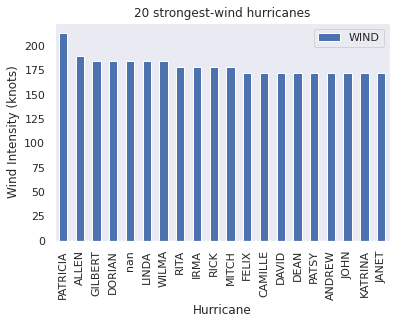

In [ ]:
sorted_df = df.sort_values(by=['WIND'], ascending=False)
removed_duplicate = sorted_df.drop_duplicates(subset=['NAME'])
strongest_wind = removed_duplicate.nlargest(20, 'WIND')
strongest_wind


plt.figure()
strongest_wind.plot.bar(x='NAME', y='WIND')
plt.xlabel('Hurricane')
plt.ylabel('Wind Intensity (knots)')
plt.title('20 strongest-wind hurricanes')
plt.grid()
plt.show()

### 6) Plot the count of all datapoints by Basin as a bar chart

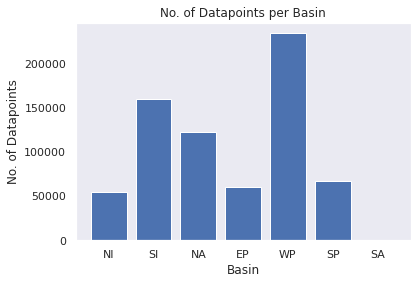

In [ ]:
y = []
for b in basin:
  count = 0
  for hurricane in df['BASIN']:
    if hurricane==b:
      count+=1
  y.append(count)

fig, ax = plt.subplots()
ax.bar(basin, y)
plt.xlabel('Basin')
plt.ylabel('No. of Datapoints')
plt.title('No. of Datapoints per Basin')
plt.grid()
plt.show()

### 7) Plot the count of unique hurricanes by Basin as a bar chart.

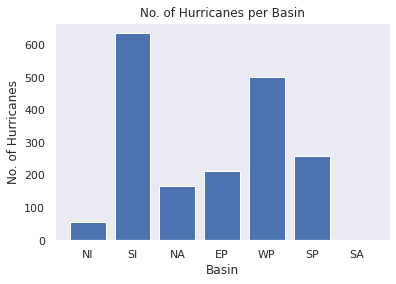

In [ ]:
y = []
for b in basin:
  count = 0
  removed_dup = df.drop_duplicates(subset=['NAME'])
  for hurricane in removed_dup['BASIN']:
    if hurricane==b:
      count+=1
  y.append(count)

fig, ax = plt.subplots()
ax.bar(basin, y)
plt.xlabel('Basin')
plt.ylabel('No. of Hurricanes')
plt.title('No. of Hurricanes per Basin')
plt.grid()
plt.show()

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude. See [here](https://seaborn.pydata.org/examples/hexbin_marginals.html) for example

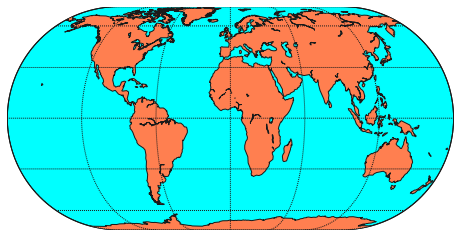

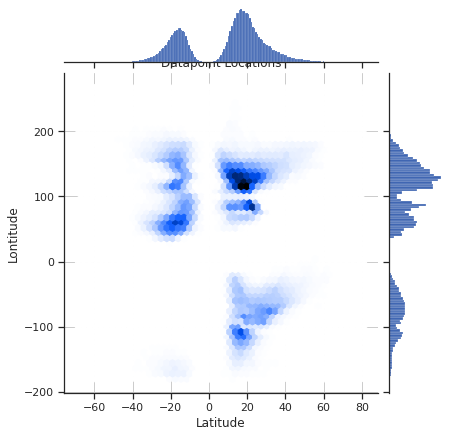

In [ ]:
sns.set_theme(style="ticks")

x = df['LAT'].values.tolist()
y = df['LON'].values.tolist()

fig, ax = plt.subplots(figsize=(8, 8))
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='eck4',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')

sns.jointplot(x=x, y=y, kind="hex", color="#003399")
plt.xlabel('Latitude')
plt.ylabel('Lontitude')
plt.grid()
plt.title('Datapoint Locations')
plt.show()

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [ ]:
katrina = df.loc[df['NAME'] == 'KATRINA']
kat2005 = katrina.index[katrina['ISO_TIME'] > pd.Timestamp(2005, 1, 1, 12)]
katrina_index = (kat2005.tolist())[0]
katrina_SID = (df['SID'])[katrina_index]
katrina_SID

'2005236N23285'

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

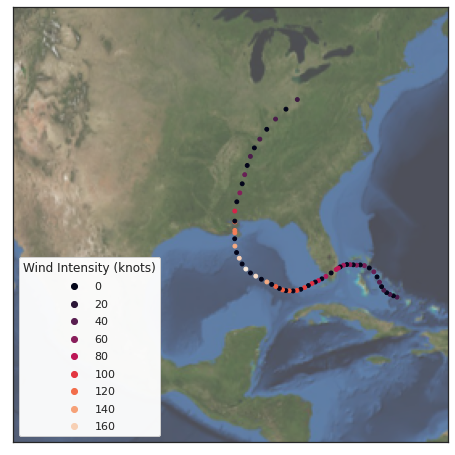

In [ ]:
kat = df.loc[df['SID'] == katrina_SID]
kat_wind = kat['WIND'].tolist()
kat_lon = kat['LON']
kat_lat = kat['LAT']

fig, ax = plt.subplots(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=4E6, 
            lat_0=30, lon_0=-90,)
m.bluemarble(scale=0.5, alpha=0.7);

for i in range(len(kat_wind)):
  if math.isnan(kat_wind[i]):
    kat_wind[i] = 0

#cols=pltcolor(kat_wind)
colors = [str(item/255.) for item in kat_wind]

x, y = m(kat_lon, kat_lat)
katscatter = ax.scatter(x, y, marker='o', s=15, c=kat_wind)
legend = ax.legend(*katscatter.legend_elements(), loc='lower left', title='Wind Intensity (knots)')
ax.add_artist(legend)
plt.show()


### 10) Make time the index on your dataframe

In [ ]:
newdf = df.set_index('ISO_TIME')
newdf

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08 12:00:00,2021067S24058,2021,20,SI,MM,IMAN,NR,-28.3000,62.2000,NaN,NaN
2021-03-08 15:00:00,2021067S24058,2021,20,SI,MM,IMAN,NR,-27.9243,62.4292,NaN,NaN
2021-03-08 18:00:00,2021067S24058,2021,20,SI,MM,IMAN,NR,-27.4000,62.7000,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample` to yearly data


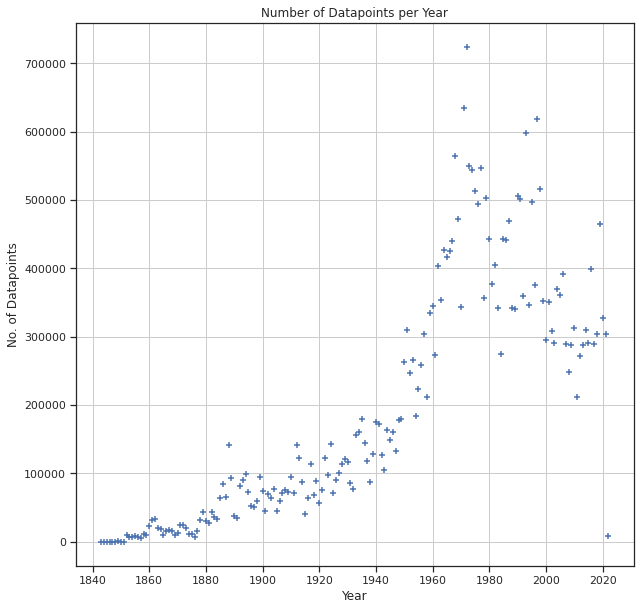

In [ ]:
newdf_yearly = newdf.resample('Y').sum()

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(newdf_yearly.index.values,
           newdf_yearly['NUMBER'],
           marker="+")
ax.set(xlabel="Year",
       ylabel="No. of Datapoints",
       title="Number of Datapoints per Year")
plt.grid()
plt.show()

###12) Create a  filtered Pandas dataframe consisting only of Atlantic tropical cyclones since 1979, ranging from tropical storms to hurricanes (see [link](https://www.ncei.noaa.gov/news/inventory-tropical-cyclone-tracks) for details on TC categories). Store this as a new dataframe, named NA_TCs

In [ ]:
post79 = newdf[newdf.index.year > 1979]
NA79 = post79[post79['BASIN'] == 'NA'] 
#SA79 = post79[post79['BASIN'] == 'SA']
#AT79 = NA79.append(SA79) 
NA_TCs = NA79[NA79['WIND'] > 39]
NA_TCs


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1980-08-02 00:00:00,1980214N11330,1980,57,NA,NA,ALLEN,TS,11.0,-42.8,40.2773,1005.0
1980-08-02 06:00:00,1980214N11330,1980,57,NA,NA,ALLEN,TS,11.4,-44.8,51.7851,1000.0
1980-08-02 12:00:00,1980214N11330,1980,57,NA,NA,ALLEN,TS,11.9,-46.9,63.2929,995.0
1980-08-02 18:00:00,1980214N11330,1980,57,NA,NA,ALLEN,TS,12.3,-49.1,69.0468,990.0
1980-08-03 00:00:00,1980214N11330,1980,57,NA,NA,ALLEN,TS,12.4,-51.4,74.8007,985.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26 12:00:00,2019323N19302,2019,99,NA,NA,SEBASTIEN,ET,52.2,-9.3,51.7851,970.0
2019-11-26 18:00:00,2019323N19302,2019,99,NA,NA,SEBASTIEN,ET,52.2,-8.9,46.0312,972.0
2019-11-27 00:00:00,2019323N19302,2019,99,NA,NA,SEBASTIEN,ET,51.8,-8.2,46.0312,974.0


### 13) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

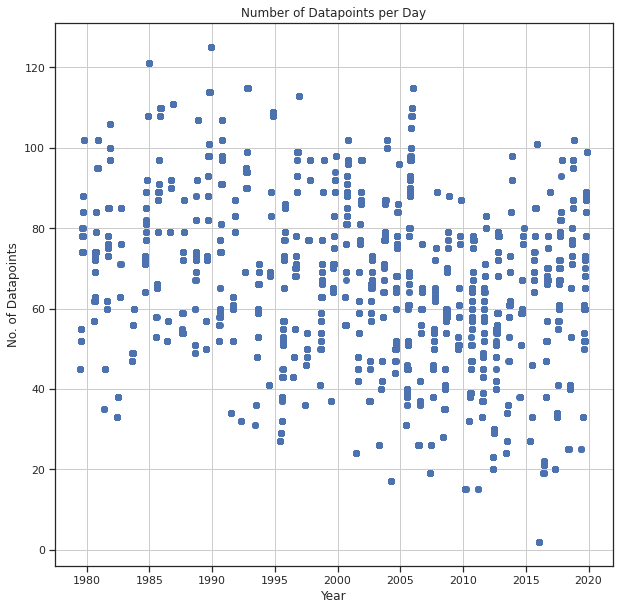

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

NA_TCs_day = NA_TCs.resample('D').sum()
ax.scatter(NA_TCs.index.values,
           NA_TCs['NUMBER'])
ax.set(xlabel="Year",
       ylabel="No. of Datapoints",
       title="Number of Datapoints per Day")
plt.grid()
plt.show()

###14) Using the categories based on wind speed, assign a class to each row in the dataframe, ranging from tropical cyclones through category 5 hurricanes

In [ ]:
#classdf = [None]*len(df.index)
classNAT = [None]*len(NA_TCs.index)
winds = NA_TCs['WIND'].tolist()

for i in range(len(winds)):
  if winds[i] < 74:
    classNAT[i] = 'TS'
  elif winds[i] > 73 and winds[i] < 96:
    classNAT[i] = 'C1'
  elif winds[i] > 95 and winds[i] < 111:
    classNAT[i] = 'C2'
  elif winds[i] > 110 and winds[i] < 131:
    classNAT[i] = 'C3'
  elif winds[i] > 130 and winds[i] < 156:
    classNAT[i] = 'C4'
  else:
    classNAT[i] = 'C5'

#df['CLASS'] = classdf
NA_TCs['CLASS'] = classNAT
NA_TCs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES,CLASS
ISO_TIME,,,,,,,,,,,,
1979-06-22 00:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-54.7,40.2773,1007.0,TS
1979-06-22 06:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-55.8,46.0312,1005.0,TS
1979-06-22 12:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-56.9,57.5390,1006.0,TS
1979-06-22 18:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.1,-58.3,46.0312,1008.0,TS
1979-06-23 00:00:00,1979171N10315,1979,45,NA,CS,ANA,TS,14.1,-59.8,40.2773,1010.0,TS
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-12 18:00:00,2010067S25317,2010,15,SA,MM,NaN,DS,-38.0,-31.3,51.7851,995.0,TS
2011-03-16 00:00:00,2011069S20321,2011,15,SA,MM,NaN,DS,-25.2,-34.7,40.2773,998.0,TS
2011-03-16 06:00:00,2011069S20321,2011,15,SA,MM,NaN,DS,-25.6,-33.5,46.0312,993.0,TS


###15) Create a histogram plot of the wind speed for all North Atlantic tropical cyclones

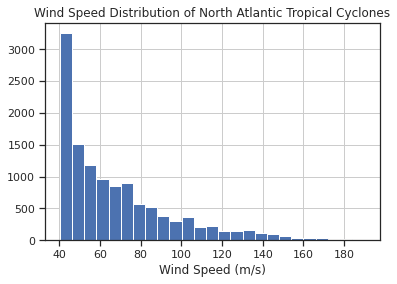

In [ ]:
n_bins = 25
plt.figure()
plt.hist(x=NA_TCs['WIND'], bins=n_bins)
plt.xlabel('Wind Speed (m/s)')
plt.title('Wind Speed Distribution of North Atlantic Tropical Cyclones')
plt.grid()
plt.show()

###16) Create a scatter plot showing the relationship between wind speed and pressure for all NA tropical cyclones

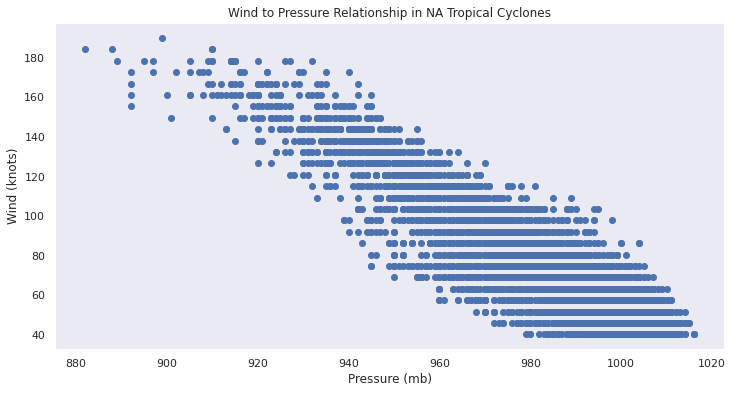

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(NA_TCs['PRES'], 
           NA_TCs['WIND'],)
ax.set(xlabel="Pressure (mb)",
       ylabel="Wind (knots)",
       title="Wind to Pressure Relationship in NA Tropical Cyclones")
plt.grid()
plt.show()

###17) Fit a polynomial regression curve to fit a model to the speed vs. pressure data

Use the following code from Scikit-learn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Set the feature vector X and the target y in the following code. Recall the size of X should be [N samples, N_features] (the number of features here should be one) and the size of y should be [N samples,1]

In [ ]:
X = (NA_TCs['PRES'].values).reshape(len(NA_TCs['PRES']), 1)
y = (NA_TCs['WIND'].values).reshape(len(NA_TCs['WIND']), 1)

 # Check if NaNs are present and replacing them
if np.isnan(X).any(): 
  X[np.isnan(X)] = np.median(X[~np.isnan(X)])
if np.isnan(y).any():
  y[np.isnan(y)] = np.median(y[~np.isnan(y)])
print(np.isnan(X).any(), np.isnan(y).any())

False False


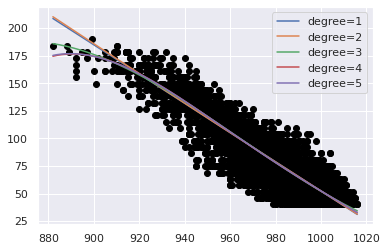

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting


X_test = np.linspace(X.min(), X.max(), 500)[:, None]

X_test[np.isnan(X_test)] = np.median(X_test[~np.isnan(X_test)])

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 2, 3, 4, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.legend(loc='best');

Generate the training and validation curve for different polynomial degrees

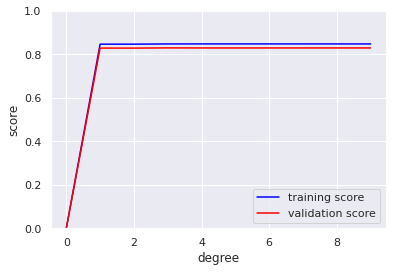

In [ ]:
degree = np.arange(0, 10)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

What do you think is the best choice for the polynomial degree? Could you make a physical argment for why one particular choice might be the best? Hint: recall dimensional analysis
 

###18) Walk through [this Notebook](https://colab.research.google.com/drive/1lCRVOHgJ8gvEvQMLxFPwLcxGlSfQ8ui-?usp=sharing) that uses ERA5 data for pressure and Sea Surface Temperature distributions around tropical cyclone centers to train a ML model. Be sure to follow the PCA analysis and the random forest model setup. Discuss how well the Random Forest model performs in predicting the wind speed. How does it compare to your polynomial regression above? What may be some reasons for differences? 